In [1]:
import os
import sys
import pathlib

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from utils.processImage import get_subimage, process_image, plot_subimages, stitch_subimages
from utils.solver import sudoku, solve_sudoku


TEST_IMAGES = pathlib.Path.cwd().parent.joinpath("test_images")

## Solving a Sudoku given a numpy array

In [2]:
input_array = np.array(
[[2, 0, 6, 5, 0, 0, 4, 1, 9],
 [9, 0, 5, 0, 0, 2, 0, 0, 8],
 [0, 0, 0, 3, 9, 4, 6, 0, 5],
 [0, 5, 7, 4, 0, 0, 0, 6, 0],
 [0, 1, 0, 9, 0, 8, 0, 4, 0],
 [4, 0, 0, 0, 5, 0, 3, 8, 0],
 [1, 7, 4, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 6, 7, 9, 0, 0, 0],
 [0, 0, 9, 0, 4, 1, 8, 0, 3]])

s = sudoku(input_array)
s

[[2 0 6 5 0 0 4 1 9]
 [9 0 5 0 0 2 0 0 8]
 [0 0 0 3 9 4 6 0 5]
 [0 5 7 4 0 0 0 6 0]
 [0 1 0 9 0 8 0 4 0]
 [4 0 0 0 5 0 3 8 0]
 [1 7 4 0 0 0 0 0 0]
 [0 0 0 6 7 9 0 0 0]
 [0 0 9 0 4 1 8 0 3]]

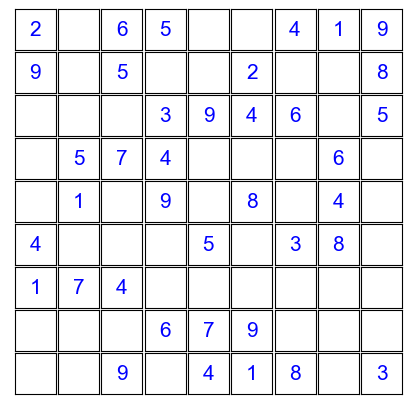

In [4]:
s.plot()

solved in 5 turns


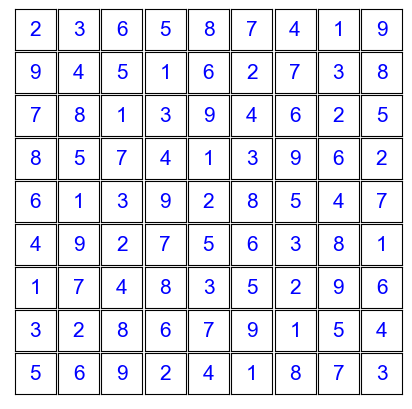

In [5]:
solve_sudoku(s)

##  Reading the Sudoku from a good quality top-down image of a Sudoku

In [2]:
fp=TEST_IMAGES.joinpath("sudoku_test.png")

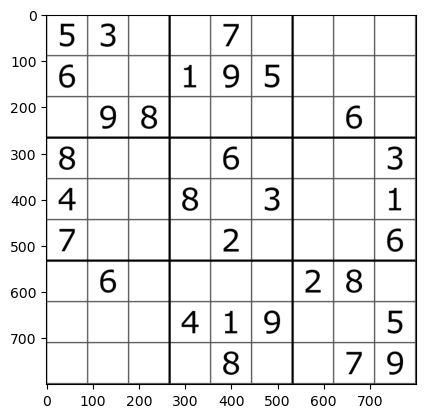

In [3]:
image = imread(fp)
image = rgb2gray(image[:,:,:3])
plt.imshow(image, cmap='gray')
plt.show()

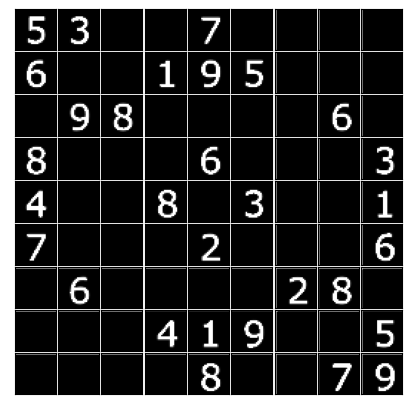

In [4]:
plot_subimages(image)

In [9]:
# from skimage import transform
# transformed_image = transform.resize(image,(540,540),anti_aliasing=False)
# stitched, x = stitch_subimages(transformed_image)
# fig, ax = plt.subplots(figsize=(10,1))
# _i=ax.imshow(1-stitched, cmap='gray')
# plt.axis('off')
# plt.savefig(TEST_IMAGES.joinpath("stitched.jpg"))
# plt.show()

c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\skimage\filters\thresholding.py:370: RuntimeWarning: invalid value encountered in divide
  mean1 = np.cumsum(counts * bin_centers) / weight1


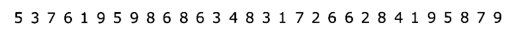

[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

In [5]:
s=process_image(fp)
s

solved in 10 turns


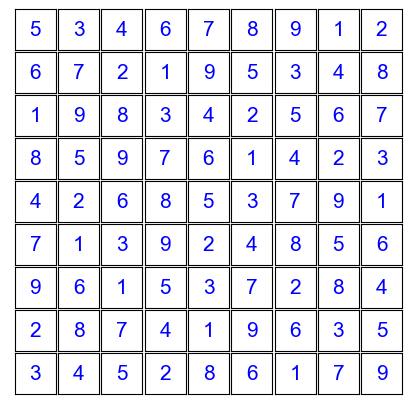

In [6]:
solve_sudoku(s)

## Example 2: From unwarped image



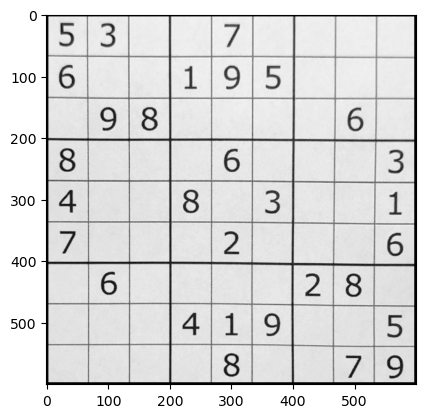

In [7]:
fp=TEST_IMAGES.joinpath("sudoku_wiki_unwarped.png")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
plt.imshow(image, cmap='gray')
plt.show()

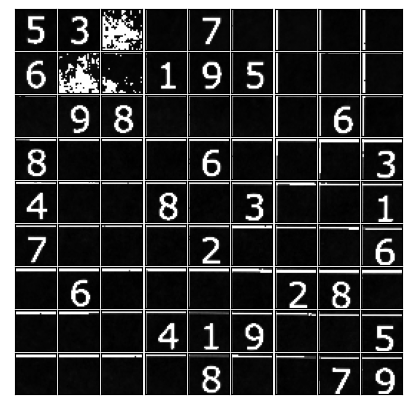

In [8]:
plot_subimages(image)

In [4]:
s=process_image(fp)
s

ValueError: invalid literal for int() with base 10: 'a'